In [45]:
import pandas as pd
import numpy as np
import os
from pathlib import Path

data_dir = "/Volumes/T7/code/學校課程/econometrics/group/data"

# 获取所有子文件夹
industry_folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]

dfs = []

column_mapping = {
    '年月日': 'date',
    '開盤價(元)': 'open',
    '最高價(元)': 'high',
    '最低價(元)': 'low',
    '收盤價(元)': 'close',
    '報酬率％': 'return',
    '成交量(千股)': 'volume(1000)',
    '成交值(千元)': 'volume_value(1000)',
    '市值(百萬元)': 'market_value(1000000)',
    '市值比重％': 'market_weight',
    '本益比-TEJ': 'pe_ratio',
    '週轉率％': 'turnover_rate',
    '成交筆數(筆)': 'trade_count',
    '股價淨值比-TEJ': 'pb_ratio',
    '殖利率％': 'dividend_yield'
}

print("開始處理各行業資料...")

# 遍历每个行业文件夹
for industry in industry_folders:
    industry_path = os.path.join(data_dir, industry)
    print(f"處理行業: {industry}")
    
    # 获取该行业文件夹中的所有Excel文件
    excel_files = [f for f in os.listdir(industry_path) if f.endswith('.xlsx')]
    
    if not excel_files:
        print(f"  {industry} 文件夹中没有找到Excel文件")
        continue
    
    for file in excel_files:
        file_path = os.path.join(industry_path, file)
        
        # 提取公司代码（文件名去掉.xlsx）
        company_code = file.replace('.xlsx', '')
        
        try:
            # 读取Excel文件
            df = pd.read_excel(file_path)
            
            # 处理表头问题
            if '年月日' in df.columns or '日期' in df.columns:
                pass
            else:
                for i, row in df.iterrows():
                    if any(str(val).find('年月日') >= 0 or str(val).find('日期') >= 0 for val in row):
                        # 将这一行设为列名
                        df.columns = row
                        # 删除之前的行
                        df = df.iloc[i+1:].reset_index(drop=True)
                        break
            
            # 重命名列
            new_columns = {}
            for col in df.columns:
                if col in column_mapping:
                    new_columns[col] = column_mapping[col]
                else:
                    # 保持原列名
                    new_columns[col] = col
            
            df = df.rename(columns=new_columns)
            
            # 添加公司代码和行业信息
            df['company_code'] = company_code
            df['industry'] = industry
            
            # 处理日期列
            if 'date' in df.columns:
                df['date'] = pd.to_datetime(df['date'], errors='coerce')
            
            # 将数值列转换为数值类型
            for col in df.columns:
                if col not in ['date', 'company_code', 'industry']:
                    try:
                        df[col] = pd.to_numeric(df[col], errors='coerce')
                    except:
                        pass
            
            # 添加到列表
            dfs.append(df)
            
            print(f"  載入 {company_code}，資料筆數：{len(df)}")
            
        except Exception as e:
            print(f"  處理文件 {file} 時出錯: {e}")

# 合并所有数据到一个DataFrame
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    
    # 排序
    if 'date' in combined_df.columns and 'company_code' in combined_df.columns:
        combined_df = combined_df.sort_values(['industry', 'company_code', 'date'])
    
    # 去除重复列
    combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]
    
    print(f"\n資料合併完成！")
    print(f"總資料筆數: {len(combined_df):,}")
    print(f"總欄位數: {combined_df.shape[1]}")
    print(f"各行業公司數量: {combined_df.groupby('industry')['company_code'].nunique().to_dict()}")
    
else:
    print("沒有成功處理任何文件，請檢查文件夾結構和文件格式")
    combined_df = None

開始處理各行業資料...
處理行業: 金保
  載入 2880，資料筆數：980
  載入 2881，資料筆數：980
  載入 2882，資料筆數：980
  載入 2883，資料筆數：980
  載入 2884，資料筆數：980
  載入 2885，資料筆數：980
  載入 2886，資料筆數：980
  載入 2887，資料筆數：980
  載入 2891，資料筆數：980
  載入 5871，資料筆數：980
  載入 2880(15~16)，資料筆數：488
  載入 2881(15~16)，資料筆數：488
  載入 2882(15~16)，資料筆數：488
  載入 2883(15~16)，資料筆數：488
  載入 2884(15~16)，資料筆數：488
  載入 2885(15~16)，資料筆數：488
  載入 2886(15~16)，資料筆數：488
  載入 2887(15~16)，資料筆數：488
  載入 2891(15~16)，資料筆數：488
  載入 5871(15~16)，資料筆數：488
處理行業: 半導
  載入 2313，資料筆數：980
  載入 2338，資料筆數：980
  載入 2454，資料筆數：980
  載入 3034，資料筆數：980
  載入 3131，資料筆數：980
  載入 3443，資料筆數：980
  載入 3661，資料筆數：980
  載入 3707，資料筆數：980
  載入 6239，資料筆數：980
  載入 8016，資料筆數：980
  載入 2313(15~16)，資料筆數：488
  載入 2338(15~16)，資料筆數：488
  載入 2454(15~16)，資料筆數：488
  載入 3034(15~16)，資料筆數：488
  載入 3131(15~16)，資料筆數：488
  載入 3443(15~16)，資料筆數：488
  載入 3661(15~16)，資料筆數：488
  載入 3707(15~16)，資料筆數：488
  載入 6239(15~16)，資料筆數：488
  載入 8016(15~16)，資料筆數：488
處理行業: 食品
  載入 1201，資料筆數：980
  載入 1203，資料筆數：980
  載入 1210，資料筆數：980
  載

In [46]:
combined_df.groupby('company_code').size()

company_code
1201           980
1201(15~16)    488
1203           980
1203(15~16)    488
1210           980
              ... 
6269(15~16)    488
8016           980
8016(15~16)    488
8215           980
8215(15~16)    488
Length: 80, dtype: int64

In [49]:
gp = combined_df.groupby('company_code')
s = gp.get_group('1201(15~16)')
s['date'].min(), s['date'].max()

(Timestamp('2015-01-05 00:00:00'), Timestamp('2016-12-30 00:00:00'))

In [48]:
t = gp.get_group('1201')
t['date'].min(), t['date'].max()

(Timestamp('2017-01-03 00:00:00'), Timestamp('2020-12-31 00:00:00'))

處理新數據後綴

In [31]:
combined_df['company_code'] = combined_df['company_code'].str.replace(r'\([^)]*\)', '', regex=True)


In [32]:
col_to_keep = ['date', 'company_code', 'open', 'high', 'low', 'close', 'return', 'volume(1000)', 'volume_value(1000)', 'market_value(1000000)', 'market_weight', 'pb_ratio', 'turnover_rate', 'trade_count', 'industry']
agg_df = combined_df[col_to_keep]
agg_df.head()

,date,company_code,open,high,low,close,return,volume(1000),volume_value(1000),market_value(1000000),market_weight,pb_ratio,turnover_rate,trade_count,industry
15659,2017-01-03,2313,11.3650,11.4381,11.3284,11.4015,0.3215,4806,74894,18592,0.068,0.95,0.4032,1430,半導
15658,2017-01-04,2313,11.4381,11.4746,11.4015,11.4381,0.3205,5552,86896,18652,0.068,0.96,0.4658,1768,半導
15657,2017-01-05,2313,11.4381,11.5842,11.4015,11.5112,0.6390,10255,161488,18771,0.068,0.96,0.8604,2548,半導
15656,2017-01-06,2313,11.5842,11.7670,11.5477,11.6939,1.5873,17404,278078,19069,0.069,0.98,1.4603,4347,半導
15655,2017-01-09,2313,11.8400,11.8766,11.6573,11.7304,0.3125,11389,182922,19129,0.070,0.98,0.9556,2650,半導


In [33]:
agg_df.columns

Index(['date', 'company_code', 'open', 'high', 'low', 'close', 'return',
       'volume(1000)', 'volume_value(1000)', 'market_value(1000000)',
       'market_weight', 'pb_ratio', 'turnover_rate', 'trade_count',
       'industry'],
      dtype='object', name=0)

check data quality 

In [34]:
from eda import inspect_columns

inspect_columns(agg_df)

,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
0,,,,,,,,
date,False,1468,False,0.00,2017-01-03 00:00:00,2020-01-03 00:00:00,2016-12-30 00:00:00,datetime64[ns]
company_code,False,40,False,0.00,2313,3661,1702,object
open,False,26440,False,0.00,11.365,236.068,40.8456,float64
high,False,26527,False,0.00,11.4381,239.4267,41.0461,float64
low,False,26253,False,0.00,11.3284,219.2745,40.7787,float64
close,False,26589,False,0.00,11.4015,219.7544,40.8456,float64
return,False,15583,False,0.00,0.3215,-4.9793,0.0,float64
volume(1000),False,20466,False,0.00,4806,8812,627,int64
volume_value(1000),False,54184,False,0.00,74894,2100231,38376,int64


In [35]:
agg_df['date'] = pd.to_datetime(agg_df['date'], errors='coerce')
    
agg_df = agg_df.sort_values('date', ascending=True)



/var/folders/kz/g7fm_pz11tv5kbttdpy6thc40000gn/T/ipykernel_23156/2849117258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agg_df['date'] = pd.to_datetime(agg_df['date'], errors='coerce')


In [36]:
agg_df.groupby('company_code').size()

company_code
1201    1468
1203    1468
1210    1468
1215    1468
1216    1468
1219    1468
1227    1468
1229    1468
1231    1468
1702    1468
2301    1468
2313    1468
2329    1468
2338    1468
2357    1468
2382    1468
2385    1468
2454    1468
2880    1468
2881    1468
2882    1468
2883    1468
2884    1468
2885    1468
2886    1468
2887    1468
2891    1468
3034    1468
3131    1468
3376    1468
3443    1468
3661    1468
3707    1468
5347    1468
5871    1468
6153    1468
6239    1468
6269    1468
8016    1468
8215    1468
dtype: int64

## query data tool 

In [57]:
from eda import query_data
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:

j = query_data(agg_df, company_code=2881, date=None)    # caution : it's not a string ( use integer)

In [59]:
len(j)

1468

In [60]:
inspect_columns(j)

,unique,cardinality,with_null,null_pct,1st_row,random_row,last_row,dtype
0,,,,,,,,
date,True,1468,False,0.0,2015-01-05 00:00:00,2018-12-06 00:00:00,2020-12-31 00:00:00,datetime64[ns]
company_code,False,1,False,0.0,2881,2881,2881,object
open,False,757,False,0.0,25.3678,29.6407,31.5594,float64
high,False,733,False,0.0,25.5197,29.6407,31.6264,float64
low,False,757,False,0.0,25.064,29.3042,30.5878,float64
close,False,743,False,0.0,25.5197,29.3654,31.3249,float64
return,False,1214,False,0.0,-0.5917,-0.7239,-0.3198,float64
volume(1000),False,1424,False,0.0,11529,13239,23055,int64
volume_value(1000),True,1468,False,0.0,575835,635633,1074815,int64


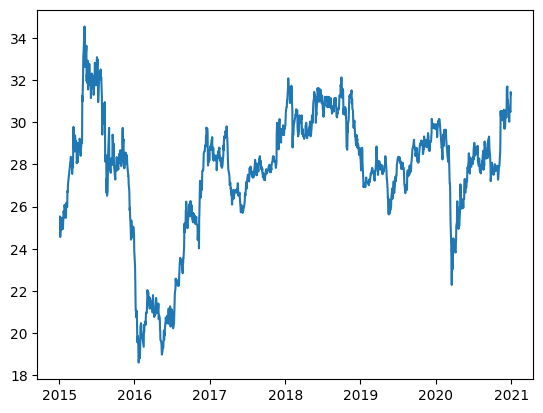

In [63]:
import matplotlib.pyplot as plt

plt.plot(j['date'], j['close'])


In [67]:
agg_df.to_csv('agg_df.csv', index=False)

In [66]:
agg_df['company_code'].value_counts()

company_code
5347    1468
3443    1468
2884    1468
2885    1468
2881    1468
2886    1468
2887    1468
2880    1468
3376    1468
2891    1468
8016    1468
2301    1468
2329    1468
6239    1468
2357    1468
2382    1468
3707    1468
5871    1468
1702    1468
2882    1468
2385    1468
3661    1468
1210    1468
6269    1468
8215    1468
3131    1468
1201    1468
1203    1468
3034    1468
6153    1468
2454    1468
1231    1468
1216    1468
1219    1468
2338    1468
1227    1468
1229    1468
2313    1468
1215    1468
2883    1468
Name: count, dtype: int64